In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [3]:
data = 'data/'
SEED = 1001

random.seed(SEED)

In [4]:
train = pd.read_csv(data + 'training_set.csv')

In [5]:
test_chunk = pd.read_csv(data + 'test_set.csv.zip', compression='zip', chunksize=200000)

In [6]:
test = test_chunk.get_chunk()

In [7]:
train_meta = pd.read_csv(data + 'training_set_metadata.csv')

In [8]:
test_meta = pd.read_csv(data + 'test_set_metadata.csv')

In [9]:
train.shape

(1421705, 6)

In [10]:
train_meta.shape

(7848, 12)

In [11]:
test_meta.shape

(3492890, 11)

In [12]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [13]:
test.head()

,object_id,mjd,passband,flux,flux_err,detected
0,13,59798.3205,2,-1.299735,1.357315,0
1,13,59798.3281,1,-2.095392,1.148654,0
2,13,59798.3357,3,-0.923794,1.763655,0
3,13,59798.3466,4,-4.009815,2.602911,0
4,13,59798.3576,5,-3.403503,5.367328,0


In [14]:
train_meta.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [15]:
test_meta.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,13,34.453125,-5.229529,169.987075,-59.956185,1,0.3048,0.3193,0.0542,41.1123,0.019
1,14,33.398438,-4.331149,167.226341,-59.936551,1,NaN,0.6323,0.0179,42.8774,0.018
2,17,348.529419,-61.755440,321.293980,-51.763351,1,NaN,0.8297,0.0605,43.6000,0.016
3,23,34.804688,-5.829153,171.307861,-60.174401,1,NaN,0.6533,0.1479,42.9640,0.023
4,34,351.321442,-64.198746,317.458993,-50.429931,1,0.4557,0.4617,0.0122,42.0540,0.023


In [16]:
train.sort_values(['object_id', 'passband'])[train['object_id'] == 615]

/anaconda3/envs/plasticc/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,object_id,mjd,passband,flux,flux_err,detected
54,615,59819.1532,0,6.878784,3.633152,0
55,615,59820.1047,0,39.364853,3.775619,1
56,615,59821.1026,0,-10.422381,4.172683,0
57,615,59822.1105,0,-65.485130,4.362876,1
58,615,59823.1505,0,-113.349159,4.069051,1
74,615,59851.1114,0,-68.502457,3.338555,1
105,615,59874.0599,0,-97.353195,3.133990,1
106,615,59875.0311,0,-97.523880,2.963075,1
107,615,59876.0231,0,-108.672577,3.449714,1
108,615,59877.0238,0,-116.913223,3.097836,1


In [17]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [34]:
list_1=train[:1000000]['object_id'].value_counts().index.tolist()

In [35]:
list_2=train[1000000:]['object_id'].value_counts().index.tolist()

In [36]:
print(list_1)
print(list_2)

[89387, 68835, 328728, 253634, 199387, 167910, 338456, 161521, 201890, 112886, 187545, 177812, 223940, 200148, 46804, 329826, 39846, 50395, 57263, 330517, 92904, 170133, 337180, 97687, 136949, 95127, 213698, 327691, 264234, 162531, 106818, 330252, 83348, 87685, 70046, 115336, 307751, 298019, 290877, 332569, 150266, 305185, 269366, 91291, 329239, 310353, 305958, 177297, 324169, 329848, 204989, 19154, 103145, 199356, 128405, 106730, 236205, 260564, 329854, 312903, 213128, 331846, 252575, 160426, 249296, 36085, 59128, 198788, 160921, 305218, 103162, 42689, 284475, 314451, 216227, 253105, 262731, 213157, 86759, 26531, 104701, 341769, 43962, 196240, 282714, 188405, 331379, 234657, 77041, 62384, 98533, 281632, 239050, 330311, 175824, 58323, 138947, 125426, 328047, 70816, 92334, 215463, 284997, 296285, 110768, 131305, 209120, 20934, 184530, 54416, 265034, 52370, 341032, 118455, 268812, 14983, 336603, 135054, 216087, 15475, 176675, 148543, 66548, 254469, 240038, 300864, 54883, 47725, 48749, 24

In [37]:
[i for i in list_1 if i in list_2]

[56174841]

In [38]:
S1 = set(list_1)
S2 = set(list_2)
S1.intersection(S2)

{56174841}

In [16]:
train['passband'].value_counts()

5    299025
4    277119
2    238049
3    233520
0    197493
1    176499
Name: passband, dtype: int64

In [17]:
test['passband'].value_counts()

0    37146
3    32665
2    32665
1    32665
4    32572
5    32287
Name: passband, dtype: int64

Gaps in measurement times may explain different numbers of measurements across passbands but the gap between passband 1 and 5 in terms of measurements taken in the training set is quite large.

# Distribution of target

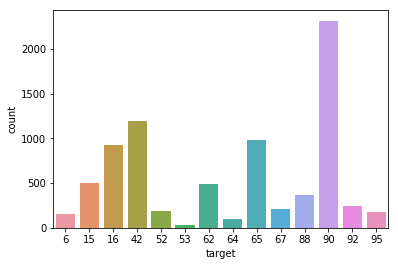

In [19]:
sns.countplot(train_meta['target'])

In [20]:
train_meta['target'].value_counts()

90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: target, dtype: int64

Most objects in the training set are class 90 by far. The next most frequent class (42) occurs approximately half as much.

# Correlation plots of train and train_meta data

In [21]:
train_meta.corr()['target'].sort_values()

mwebv                -0.174853
object_id            -0.122899
gal_b                -0.119809
decl                 -0.018324
ra                   -0.014805
gal_l                 0.025688
hostgal_photoz_err    0.110821
ddf                   0.181522
hostgal_photoz        0.244450
distmod               0.274068
hostgal_specz         0.412562
target                1.000000
Name: target, dtype: float64

hostgal_specz is relatively correlated with the target. This is the redshift of the host galaxy closest to the object measured through spectroscopy. Most objects in the test set do not have an associated specz measurement (but they do have the much less accurate photoz). A model relying heavily on hostgal_specz during training is likely not to be as accurate in practice as a model that more heavily relies on other features.

In [22]:
test_meta.hostgal_specz.isna().value_counts()

True     3372497
False     120393
Name: hostgal_specz, dtype: int64

In [23]:
test_meta.hostgal_photoz.isna().value_counts()

False    3492890
Name: hostgal_photoz, dtype: int64

## Correlation between features in training set

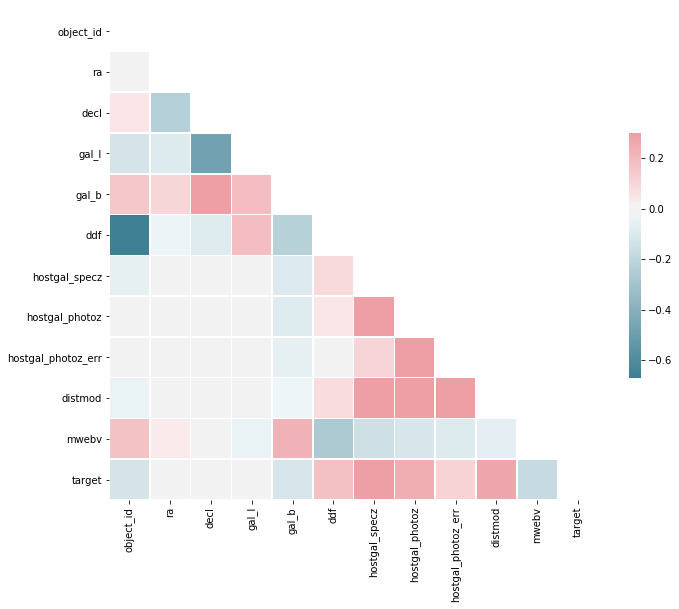

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(train_meta.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_meta.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looking at this plot more closely:

In [25]:
train_meta.corr()['decl'].sort_values()

gal_l                -0.479090
ra                   -0.237186
ddf                  -0.081657
hostgal_photoz_err   -0.020795
target               -0.018324
distmod              -0.016917
hostgal_specz        -0.013626
hostgal_photoz       -0.011385
mwebv                -0.000572
object_id             0.047821
gal_b                 0.389756
decl                  1.000000
Name: decl, dtype: float64

Some negative correlation seen here between declination (sky coordinate - latitude) and galactic latitude. Both of these are measured in degrees - is there some astronomical explanation for this? What exactly is the difference between latitude and galactic latitude? 

In [26]:
train_meta.corr()['hostgal_photoz'].sort_values()

mwebv                -0.112734
gal_b                -0.081450
object_id            -0.017225
decl                 -0.011385
gal_l                -0.010038
ra                   -0.001598
ddf                   0.042447
target                0.244450
hostgal_photoz_err    0.491055
hostgal_specz         0.550373
distmod               0.867516
hostgal_photoz        1.000000
Name: hostgal_photoz, dtype: float64

Good to see some positive correlation between hostgal_specz and hostgal_photoz but the degree to which they are correlated does not instill much faith in the accuracy of the photometric measurements. distmod is defined as the distance (modulus) between the object and the galaxy from which the redshift is measured (by photometry) so it makes sense that these two features are highly correlated

In [27]:
train_meta.corr()['mwebv'].sort_values()

ddf                  -0.267189
target               -0.174853
hostgal_specz        -0.146782
hostgal_photoz       -0.112734
hostgal_photoz_err   -0.084931
distmod              -0.062727
gal_l                -0.046744
decl                 -0.000572
ra                    0.028959
object_id             0.171717
gal_b                 0.233316
mwebv                 1.000000
Name: mwebv, dtype: float64

Interesting to see some negative correlation beween mwebv (where larger values indicate more dust along line of sight to objects - making objects appear more red) and ddf (deep drilling fields) which are small patches of the sky that are often sampled to achieve great depth (i.e. measure flux from fainter objects). DDF objects will have light-curve points that are extremely well determined. This could mean that objects that have a ddf of 1 will have much more accurate measurements of flux than others especially if there is less dust along the line of sight from the telescope to the object (but should be noted that measurements have been corrected for MWEBV so not sure how much this holds true)

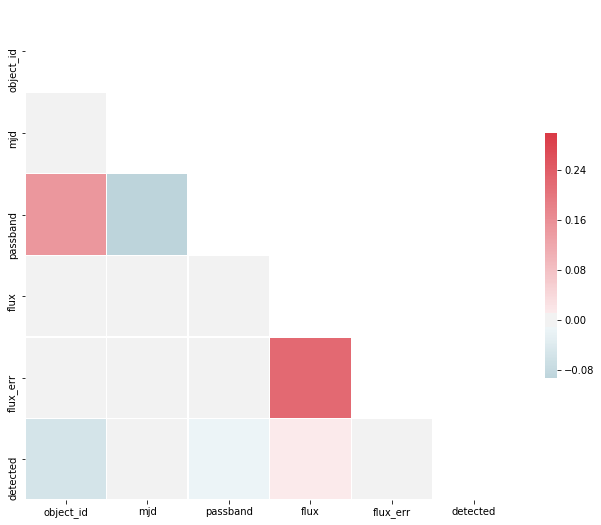

In [28]:
# Generate a mask for the upper triangle
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Not much of interest in terms of correlation between features of the time-series data

## Correlation between features in test set

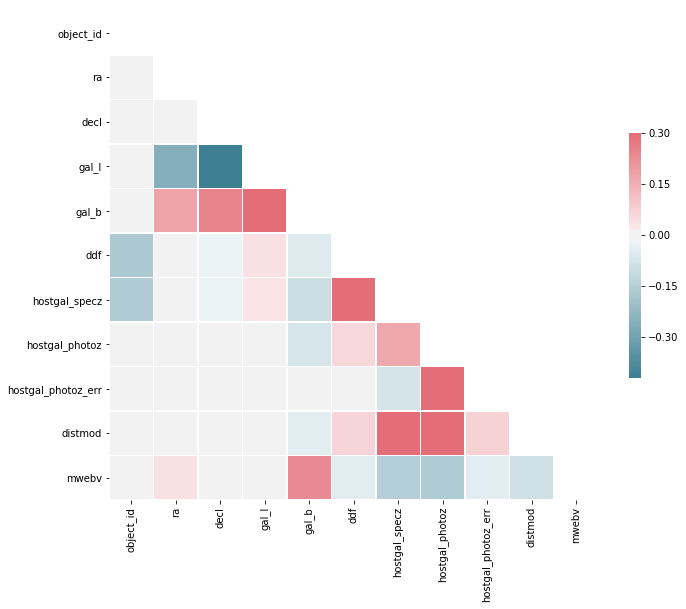

In [29]:
# Generate a mask for the upper triangle
mask = np.zeros_like(test_meta.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(test_meta.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
test_meta.corr()['decl'].sort_values()

gal_l                -0.419690
hostgal_specz        -0.027585
ddf                  -0.024302
ra                   -0.013771
distmod              -0.004942
mwebv                -0.003605
object_id             0.005068
hostgal_photoz_err    0.006007
hostgal_photoz        0.008102
gal_b                 0.252064
decl                  1.000000
Name: decl, dtype: float64

Declination is again negatively correlated with galactic longitude in the test set - this relationship would be worth researching. Some positive correlation between hostgal_specz and ddf here but since most measurements of z in test are through photometry, this is probably not worth exploring. 

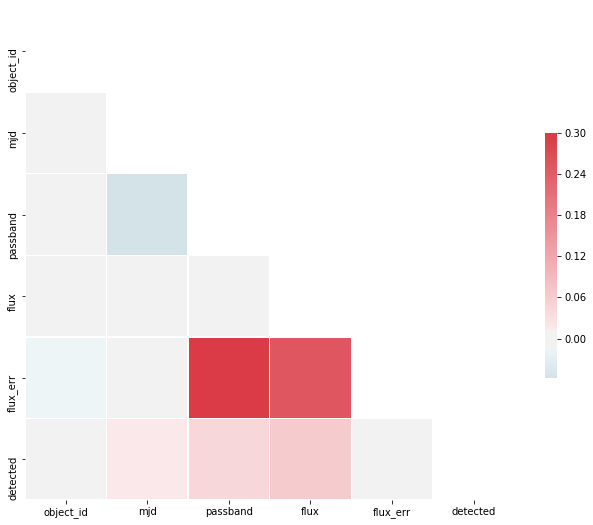

In [31]:
# Generate a mask for the upper triangle
mask = np.zeros_like(test.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(test.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Not much worth discussing here again

# Converting training time-series data into numpy arrays with format (mjd, flux, flux_err, detected) for ease of plotting

In [32]:
def coordinate_array(x):
    return np.asarray([x['mjd'], x['flux'], x['flux_err'], int(x['detected'])])

In [33]:
train['coordinate'] = train.apply(lambda x: coordinate_array(x), axis=1)

In [34]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected,coordinate
0,615,59750.4229,2,-544.810303,3.622952,1,"[59750.4229, -544.810303, 3.6229519999999997, ..."
1,615,59750.4306,1,-816.434326,5.553370,1,"[59750.4306, -816.4343259999999, 5.55337, 1.0]"
2,615,59750.4383,3,-471.385529,3.801213,1,"[59750.4383, -471.385529, 3.8012129999999997, ..."
3,615,59750.4450,4,-388.984985,11.395031,1,"[59750.445, -388.984985, 11.395031, 1.0]"
4,615,59752.4070,2,-681.858887,4.041204,1,"[59752.407, -681.858887, 4.0412040000000005, 1.0]"


In [35]:
train = train.groupby(['object_id', 'passband'])['coordinate'].apply(np.vstack).to_frame().reset_index()

In [36]:
train.head(10)

,object_id,passband,coordinate
0,615,0,"[[59819.1532, 6.878784, 3.6331519999999995, 0...."
1,615,1,"[[59750.4306, -816.4343259999999, 5.55337, 1.0..."
2,615,2,"[[59750.4229, -544.810303, 3.6229519999999997,..."
3,615,3,"[[59750.4383, -471.385529, 3.8012129999999997,..."
4,615,4,"[[59750.445, -388.984985, 11.395031, 1.0], [59..."
5,615,5,"[[59752.4435, -355.88678, 10.421921000000001, ..."
6,713,0,"[[59851.2006, 7.267655, 2.866838, 0.0], [59874..."
7,713,1,"[[59825.2676, 7.615042, 1.1603290000000002, 1...."
8,713,2,"[[59825.26, 9.110147, 1.013889, 0.0], [59839.2..."
9,713,3,"[[59825.2752, 6.673630999999999, 1.932316, 1.0..."


In [37]:
for x in train.passband.value_counts().index:
    train['passband_' + str(x)] = train[train['passband']==x]['coordinate']

In [38]:
train.head()

,object_id,passband,coordinate,passband_5,passband_4,passband_3,passband_2,passband_1,passband_0
0,615,0,"[[59819.1532, 6.878784, 3.6331519999999995, 0....",NaN,NaN,NaN,NaN,NaN,"[[59819.1532, 6.878784, 3.6331519999999995, 0...."
1,615,1,"[[59750.4306, -816.4343259999999, 5.55337, 1.0...",NaN,NaN,NaN,NaN,"[[59750.4306, -816.4343259999999, 5.55337, 1.0...",NaN
2,615,2,"[[59750.4229, -544.810303, 3.6229519999999997,...",NaN,NaN,NaN,"[[59750.4229, -544.810303, 3.6229519999999997,...",NaN,NaN
3,615,3,"[[59750.4383, -471.385529, 3.8012129999999997,...",NaN,NaN,"[[59750.4383, -471.385529, 3.8012129999999997,...",NaN,NaN,NaN
4,615,4,"[[59750.445, -388.984985, 11.395031, 1.0], [59...",NaN,"[[59750.445, -388.984985, 11.395031, 1.0], [59...",NaN,NaN,NaN,NaN


In [39]:
train = train.drop(['coordinate', 'passband'], axis=1)

In [40]:
train = train.groupby('object_id').agg(sum)

In [41]:
train.head()

,passband_5,passband_4,passband_3,passband_2,passband_1,passband_0
object_id,,,,,,
615,"[[59752.4435, -355.88678, 10.421921000000001, ...","[[59750.445, -388.984985, 11.395031, 1.0], [59...","[[59750.4383, -471.385529, 3.8012129999999997,...","[[59750.4229, -544.810303, 3.6229519999999997,...","[[59750.4306, -816.4343259999999, 5.55337, 1.0...","[[59819.1532, 6.878784, 3.6331519999999995, 0...."
713,"[[59825.2971, 12.060948, 7.163382, 0.0], [5983...","[[59825.2862, 5.214194, 3.0180029999999998, 0....","[[59825.2752, 6.673630999999999, 1.932316, 1.0...","[[59825.26, 9.110147, 1.013889, 0.0], [59839.2...","[[59825.2676, 7.615042, 1.1603290000000002, 1....","[[59851.2006, 7.267655, 2.866838, 0.0], [59874..."
730,"[[59798.3576, -12.809639, 5.380097, 0.0], [598...","[[59798.3466, 2.128097, 2.610659, 0.0], [59801...","[[59798.3357, 2.939447, 1.7713279999999998, 0....","[[59798.3205, 1.177371, 1.3643, 0.0], [59801.3...","[[59798.3281, 2.320849, 1.159247, 0.0], [59801...","[[59818.274, -2.3422, 1.801066, 0.0], [59819.2..."
745,"[[59770.4039, 0.529565, 4.609781, 0.0], [59779...","[[59770.3928, 2.732148, 1.8072720000000002, 0....","[[59770.3817, -1.623621, 1.051044, 0.0], [5977...","[[59770.3662, 0.161398, 0.619084, 0.0], [59779...","[[59770.374, -0.699347, 0.602597, 0.0], [59779...","[[59818.2219, 0.5355770000000001, 1.634894, 0...."
1124,"[[59752.4435, -4.988304, 9.556839, 0.0], [5976...","[[59750.445, -16.543753, 10.423373, 0.0], [597...","[[59750.4383, 0.415283, 2.331983, 0.0], [59752...","[[59750.4229, 1.929243, 1.531847, 0.0], [59752...","[[59750.4306, 0.01647, 2.157105, 0.0], [59752....","[[59819.1532, -0.358299, 1.9680950000000001, 0..."


In [42]:
train = train_meta.merge(train, on='object_id')

In [43]:
train.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,passband_5,passband_4,passband_3,passband_2,passband_1,passband_0
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92,"[[59752.4435, -355.88678, 10.421921000000001, ...","[[59750.445, -388.984985, 11.395031, 1.0], [59...","[[59750.4383, -471.385529, 3.8012129999999997,...","[[59750.4229, -544.810303, 3.6229519999999997,...","[[59750.4306, -816.4343259999999, 5.55337, 1.0...","[[59819.1532, 6.878784, 3.6331519999999995, 0...."
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88,"[[59825.2971, 12.060948, 7.163382, 0.0], [5983...","[[59825.2862, 5.214194, 3.0180029999999998, 0....","[[59825.2752, 6.673630999999999, 1.932316, 1.0...","[[59825.26, 9.110147, 1.013889, 0.0], [59839.2...","[[59825.2676, 7.615042, 1.1603290000000002, 1....","[[59851.2006, 7.267655, 2.866838, 0.0], [59874..."
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42,"[[59798.3576, -12.809639, 5.380097, 0.0], [598...","[[59798.3466, 2.128097, 2.610659, 0.0], [59801...","[[59798.3357, 2.939447, 1.7713279999999998, 0....","[[59798.3205, 1.177371, 1.3643, 0.0], [59801.3...","[[59798.3281, 2.320849, 1.159247, 0.0], [59801...","[[59818.274, -2.3422, 1.801066, 0.0], [59819.2..."
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90,"[[59770.4039, 0.529565, 4.609781, 0.0], [59779...","[[59770.3928, 2.732148, 1.8072720000000002, 0....","[[59770.3817, -1.623621, 1.051044, 0.0], [5977...","[[59770.3662, 0.161398, 0.619084, 0.0], [59779...","[[59770.374, -0.699347, 0.602597, 0.0], [59779...","[[59818.2219, 0.5355770000000001, 1.634894, 0...."
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90,"[[59752.4435, -4.988304, 9.556839, 0.0], [5976...","[[59750.445, -16.543753, 10.423373, 0.0], [597...","[[59750.4383, 0.415283, 2.331983, 0.0], [59752...","[[59750.4229, 1.929243, 1.531847, 0.0], [59752...","[[59750.4306, 0.01647, 2.157105, 0.0], [59752....","[[59819.1532, -0.358299, 1.9680950000000001, 0..."


In [44]:
train.shape

(7848, 18)

In [45]:
train.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


## Creating a function from above

In [46]:
def time_series_coordinate(df, df_meta):
    df['coordinate'] = df.apply(lambda x: coordinate_array(x), axis=1)
    df = df.groupby(['object_id', 'passband'])['coordinate'].apply(np.vstack).to_frame().reset_index()
    for x in df.passband.value_counts().index:
        df['passband_' + str(x)] = df[df['passband']==x]['coordinate']
    df = df.drop(['coordinate', 'passband'], axis=1)
    df = df.groupby('object_id').agg(sum)
    df = df_meta.merge(df, on='object_id')
    
    return df

# Plotting light curves

In [47]:
def passband_plots(object_id):
    f, axarr = plt.subplots(2, 3, figsize=(17,10))
    axarr[0, 0].scatter(train[train['object_id']==object_id]['passband_0'].values[0][:,0],
                        train[train['object_id']==object_id]['passband_0'].values[0][:,1])
    axarr[0, 0].set_title('u')
    axarr[0, 1].scatter(train[train['object_id']==object_id]['passband_1'].values[0][:,0],
                        train[train['object_id']==object_id]['passband_1'].values[0][:,1])
    axarr[0, 1].set_title('g')
    axarr[0, 2].scatter(train[train['object_id']==object_id]['passband_2'].values[0][:,0],
                        train[train['object_id']==object_id]['passband_2'].values[0][:,1])
    axarr[0, 2].set_title('r')
    axarr[1, 0].scatter(train[train['object_id']==object_id]['passband_3'].values[0][:,0],
                        train[train['object_id']==object_id]['passband_3'].values[0][:,1])
    axarr[1, 0].set_title('i')
    axarr[1, 1].scatter(train[train['object_id']==object_id]['passband_4'].values[0][:,0],
                        train[train['object_id']==object_id]['passband_4'].values[0][:,1])
    axarr[1, 1].set_title('z')
    axarr[1, 2].scatter(train[train['object_id']==object_id]['passband_5'].values[0][:,0],
                        train[train['object_id']==object_id]['passband_5'].values[0][:,1])
    axarr[1, 2].set_title('y')
    f.subplots_adjust(hspace=0.3)

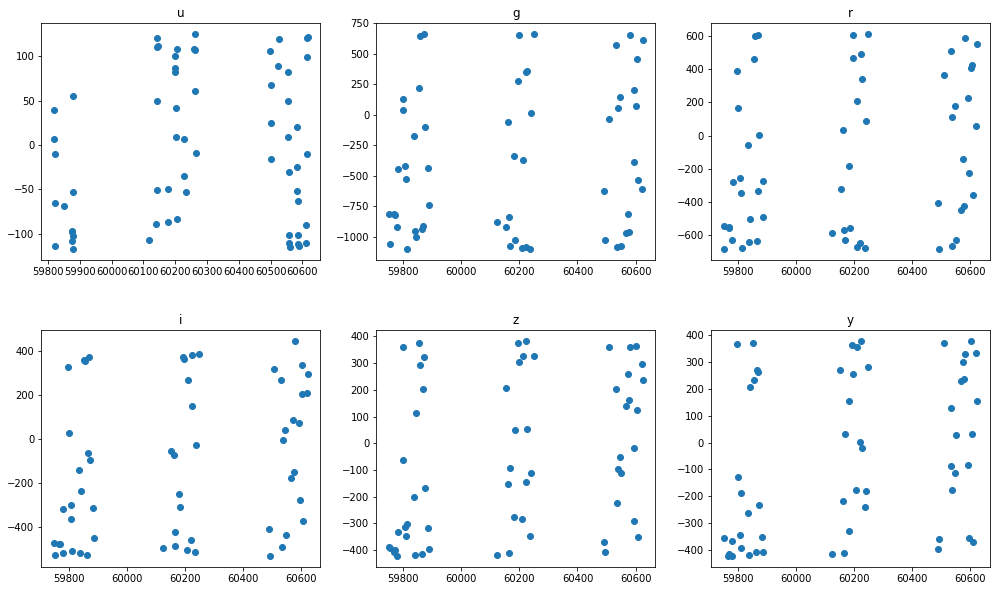

In [48]:
passband_plots(615)

In [49]:
train['target'].value_counts()

90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: target, dtype: int64

In [50]:
train['target'].value_counts().index

Int64Index([90, 42, 65, 16, 15, 62, 88, 92, 67, 52, 95, 6, 64, 53], dtype='int64')

## Plotting objects of each class

Worth working out what each of these classes is?

### Object class 90 (2313 - most frequent object in training set by far)

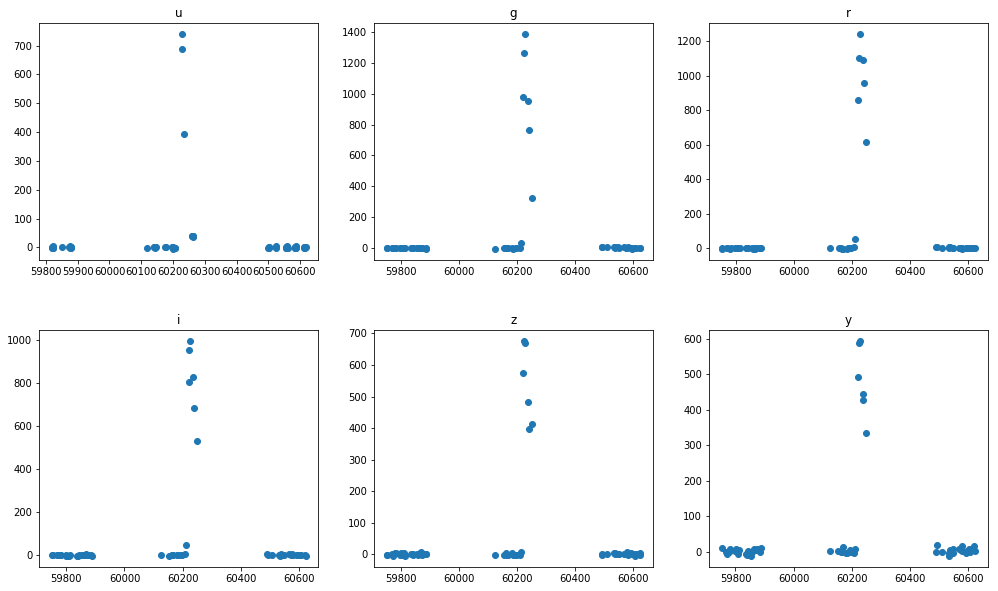

In [51]:
passband_plots(train[train['target'] == 90]['object_id'].reset_index(drop=True)[random.choice(range(0,2313))])

### Object class 42 (1193)

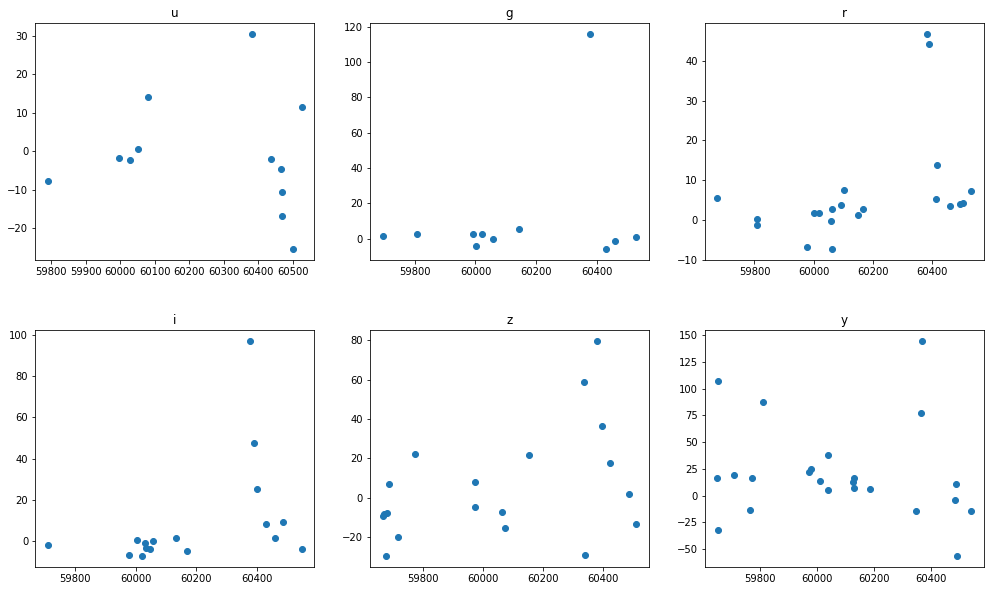

In [52]:
passband_plots(train[train['target'] == 42]['object_id'].reset_index(drop=True)[random.choice(range(0,1193))])

### Object class 65 (981)

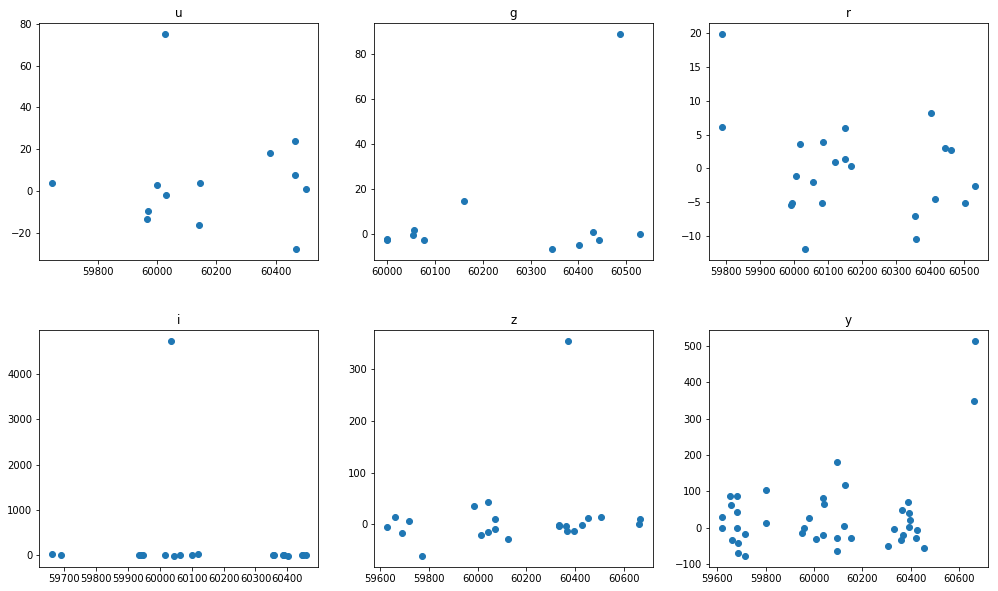

In [53]:
passband_plots(train[train['target'] == 65]['object_id'].reset_index(drop=True)[random.choice(range(0,981))])

### Object class 16 (924)

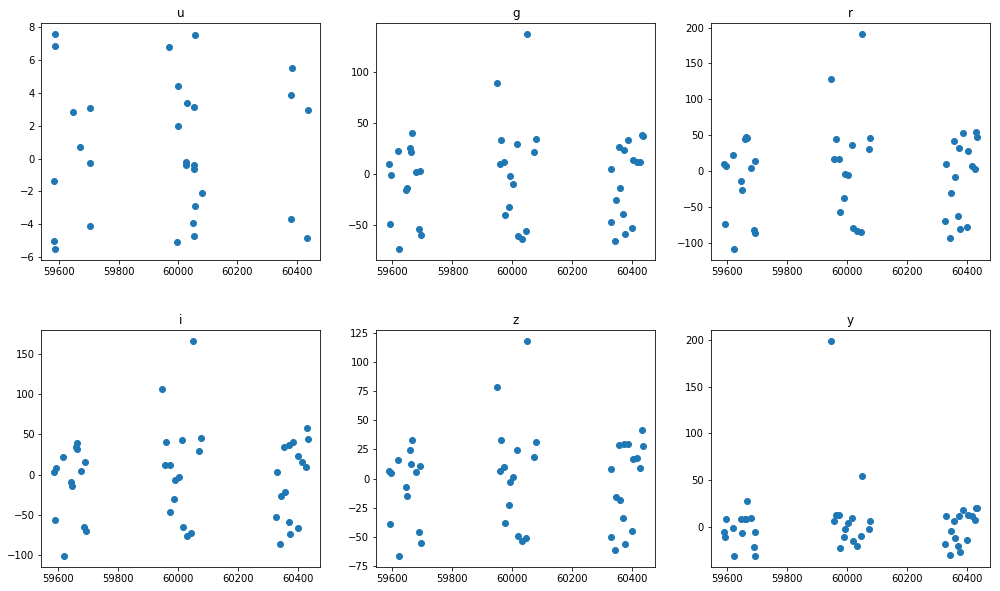

In [54]:
passband_plots(train[train['target'] == 16]['object_id'].reset_index(drop=True)[random.choice(range(0,924))])

### Object class 15 (495)

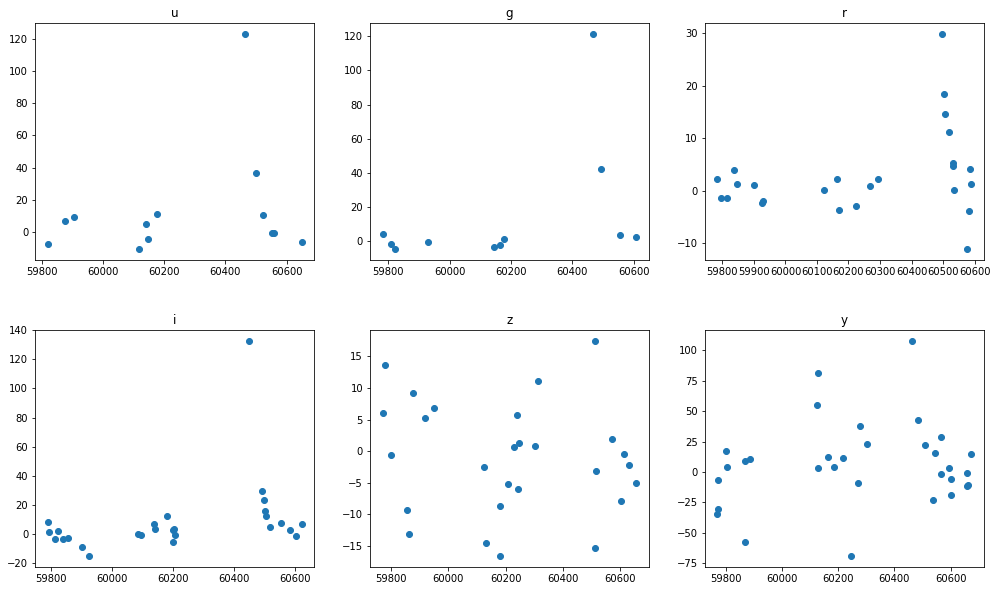

In [55]:
passband_plots(train[train['target'] == 15]['object_id'].reset_index(drop=True)[random.choice(range(0,495))])

### Object class 62 (484)

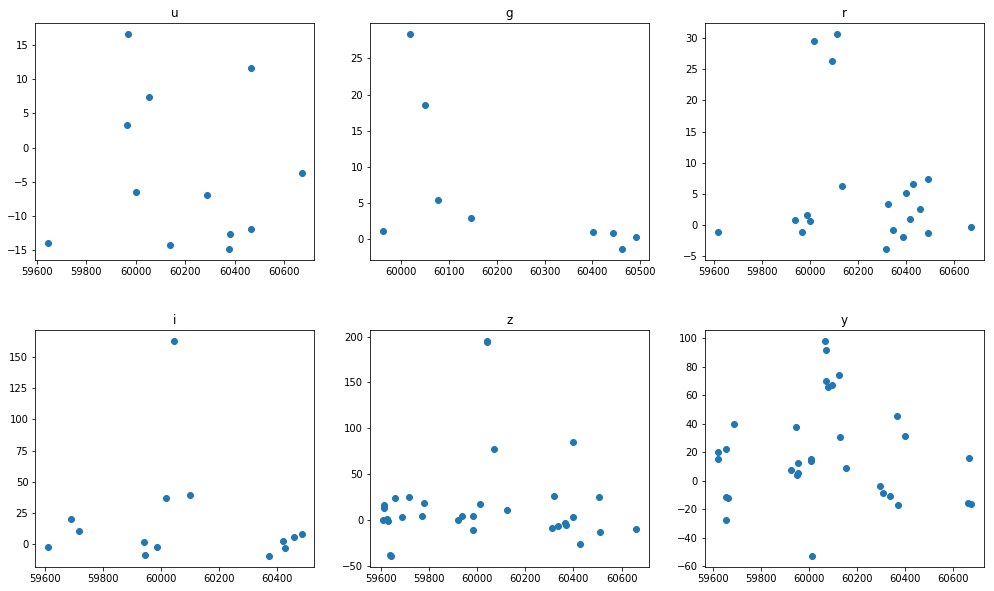

In [56]:
passband_plots(train[train['target'] == 62]['object_id'].reset_index(drop=True)[random.choice(range(0,484))])

### Object class 88 (370)

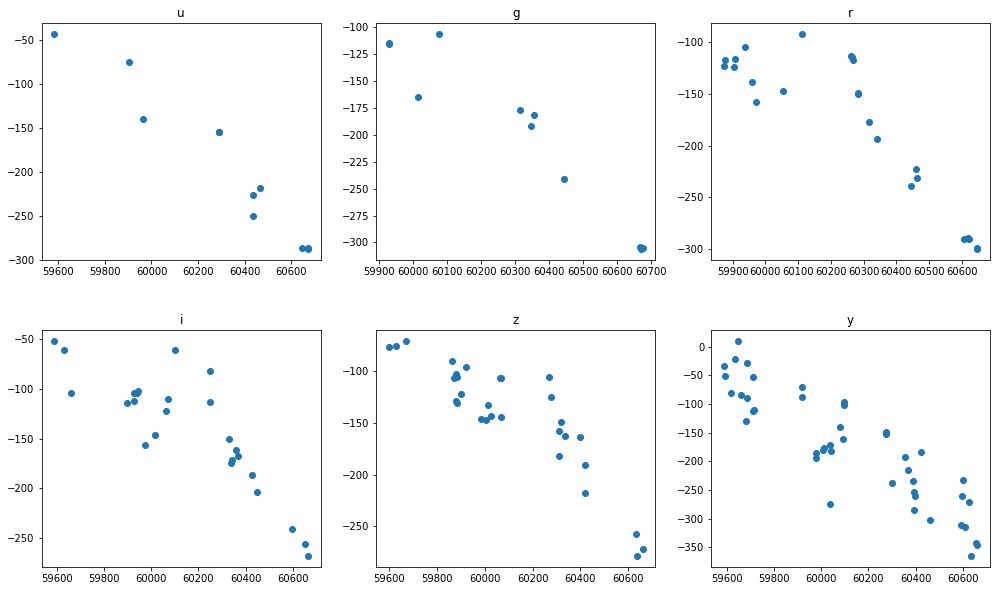

In [57]:
passband_plots(train[train['target'] == 88]['object_id'].reset_index(drop=True)[random.choice(range(0,370))])

### Object class 92 (239)

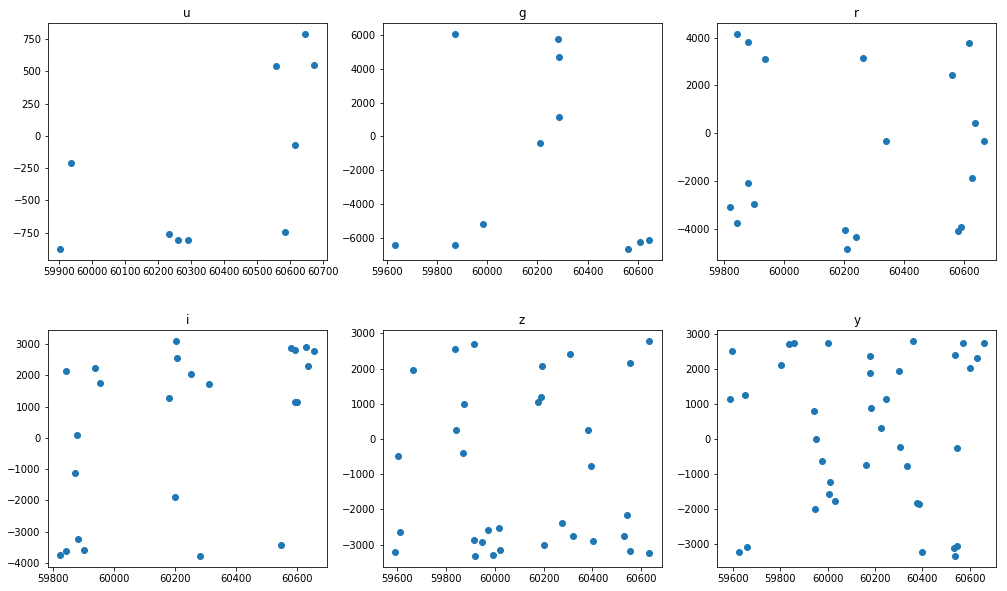

In [58]:
passband_plots(train[train['target'] == 92]['object_id'].reset_index(drop=True)[random.choice(range(0,239))])

### Object class 67 (208)

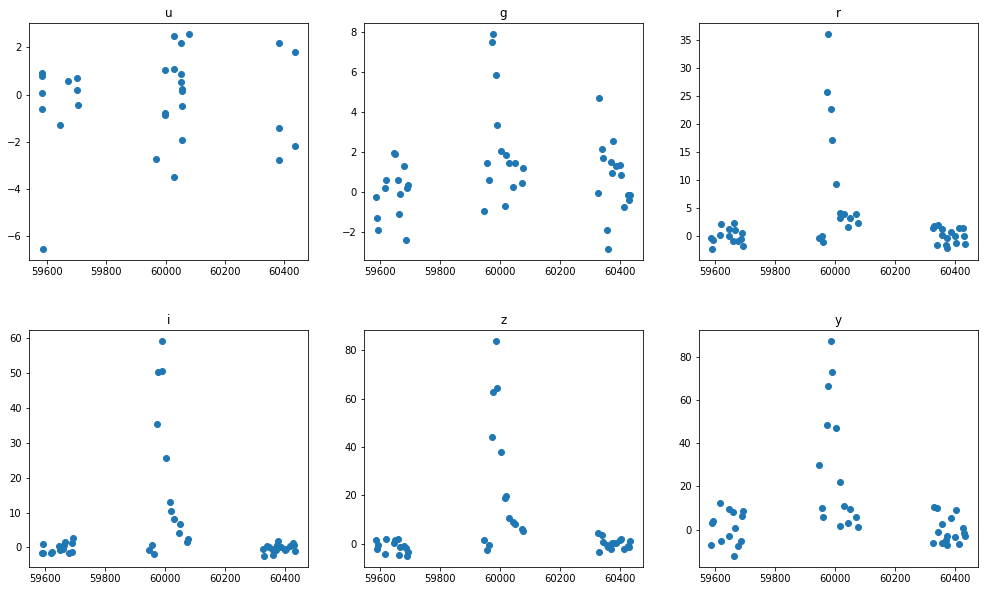

In [59]:
passband_plots(train[train['target'] == 67]['object_id'].reset_index(drop=True)[random.choice(range(0,208))])

### Object class 52 (183)

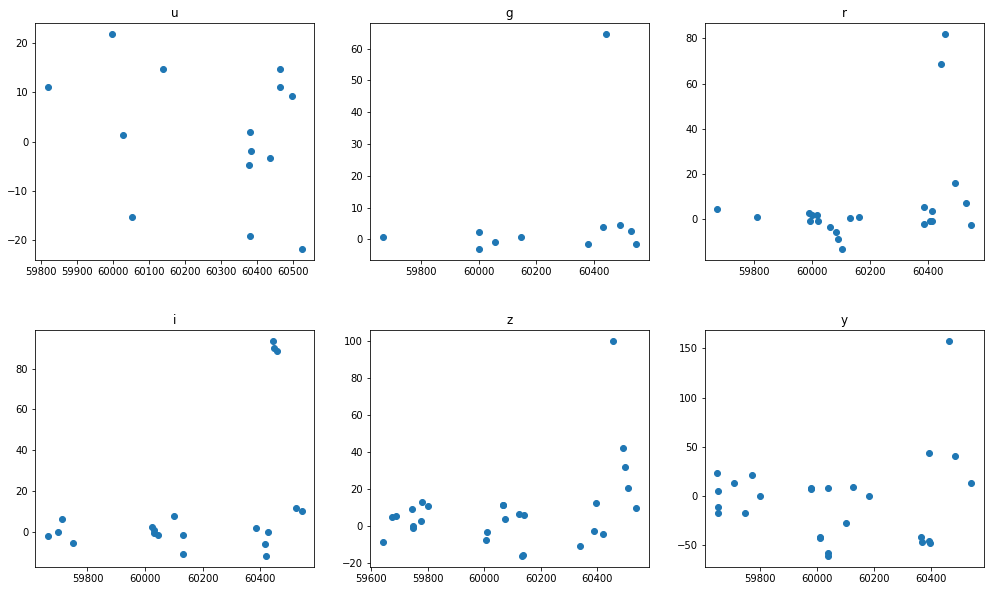

In [60]:
passband_plots(train[train['target'] == 52]['object_id'].reset_index(drop=True)[random.choice(range(0,183))])

### Object class 95 (175)

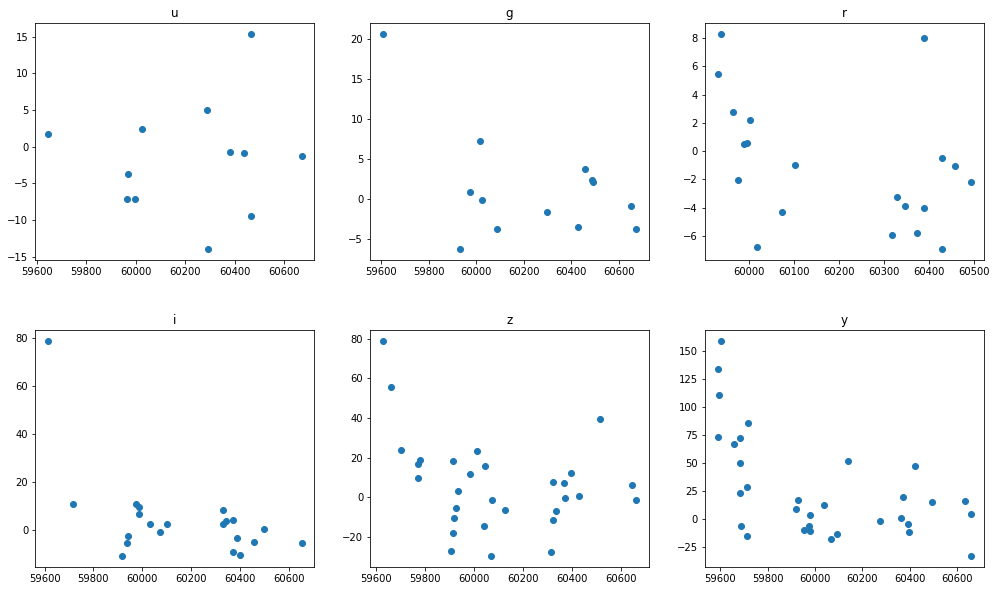

In [61]:
passband_plots(train[train['target'] == 95]['object_id'].reset_index(drop=True)[random.choice(range(0,175))])

### Object class 6 (151)

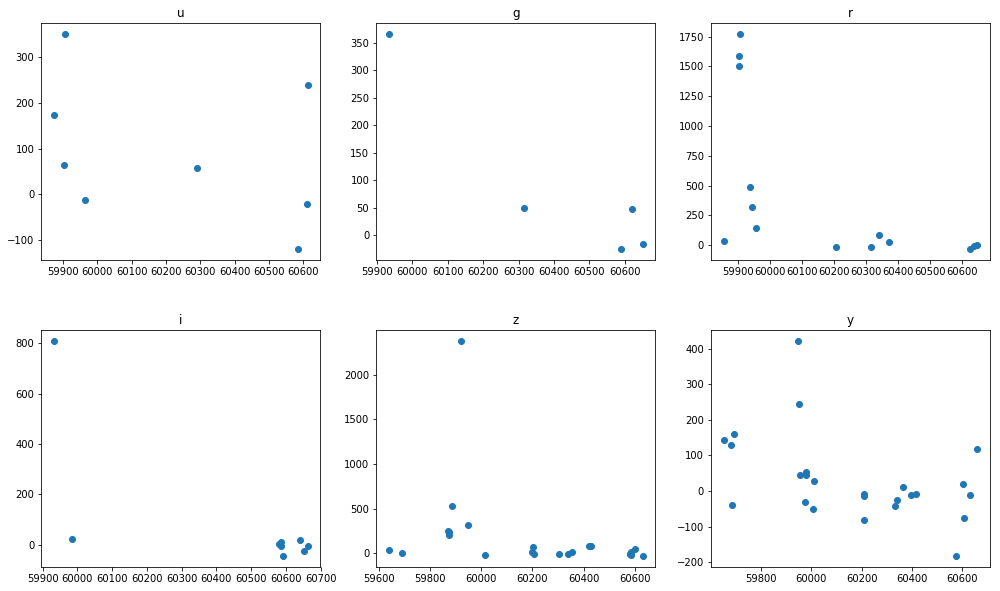

In [62]:
passband_plots(train[train['target'] == 6]['object_id'].reset_index(drop=True)[random.choice(range(0,151))])

### Object class 64 (102)

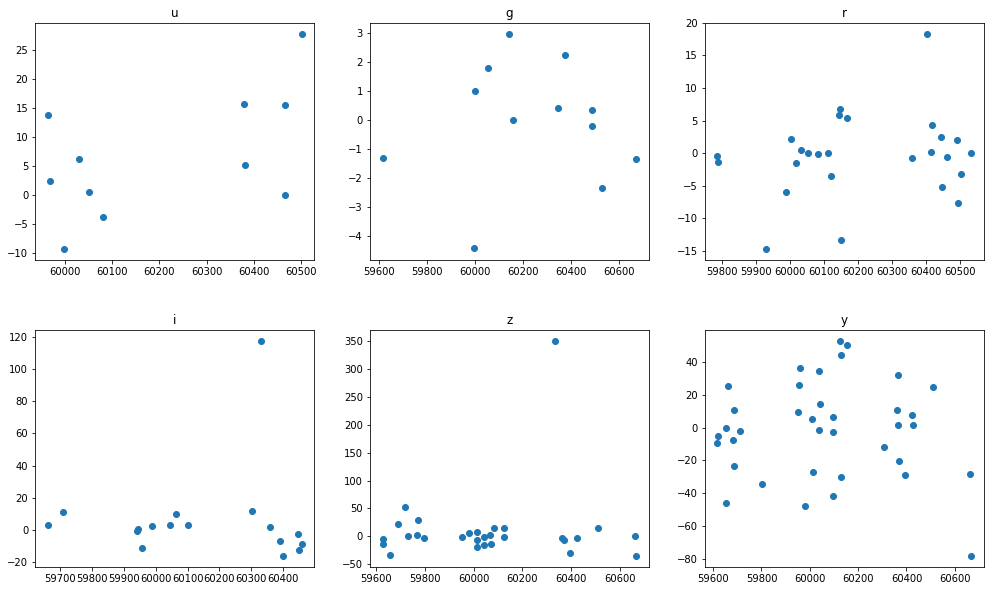

In [63]:
passband_plots(train[train['target'] == 64]['object_id'].reset_index(drop=True)[random.choice(range(0,102))])

### Object class 53 (30)

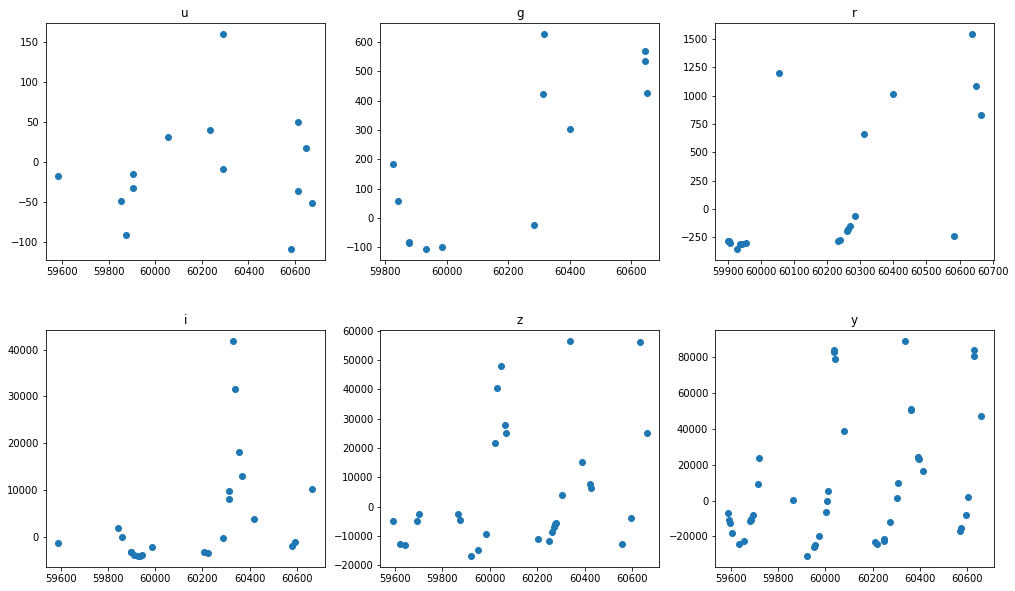

In [64]:
passband_plots(train[train['target'] == 53]['object_id'].reset_index(drop=True)[random.choice(range(0,30))])

In [76]:
def plot_overlay(object_id):
    plt.figure(figsize=(17,10))
    plt.scatter(train[train['object_id']==object_id]['passband_0'].values[0][:,0],
                train[train['object_id']==object_id]['passband_0'].values[0][:,1],
                label = 'passband u')
    plt.scatter(train[train['object_id']==object_id]['passband_1'].values[0][:,0],
                train[train['object_id']==object_id]['passband_1'].values[0][:,1],
                label = 'passband g')
    plt.scatter(train[train['object_id']==object_id]['passband_2'].values[0][:,0],
                train[train['object_id']==object_id]['passband_2'].values[0][:,1],
                label = 'passband r')
    plt.scatter(train[train['object_id']==object_id]['passband_3'].values[0][:,0],
                train[train['object_id']==object_id]['passband_3'].values[0][:,1],
                label = 'passband i')
    plt.scatter(train[train['object_id']==object_id]['passband_4'].values[0][:,0],
                train[train['object_id']==object_id]['passband_4'].values[0][:,1],
                label = 'passband z')
    plt.scatter(train[train['object_id']==object_id]['passband_5'].values[0][:,0],
                train[train['object_id']==object_id]['passband_5'].values[0][:,1],
                label = 'passband y')
    plt.xlabel('Modified Julian Time (Days)')
    plt.ylabel('Flux')
    plt.legend()

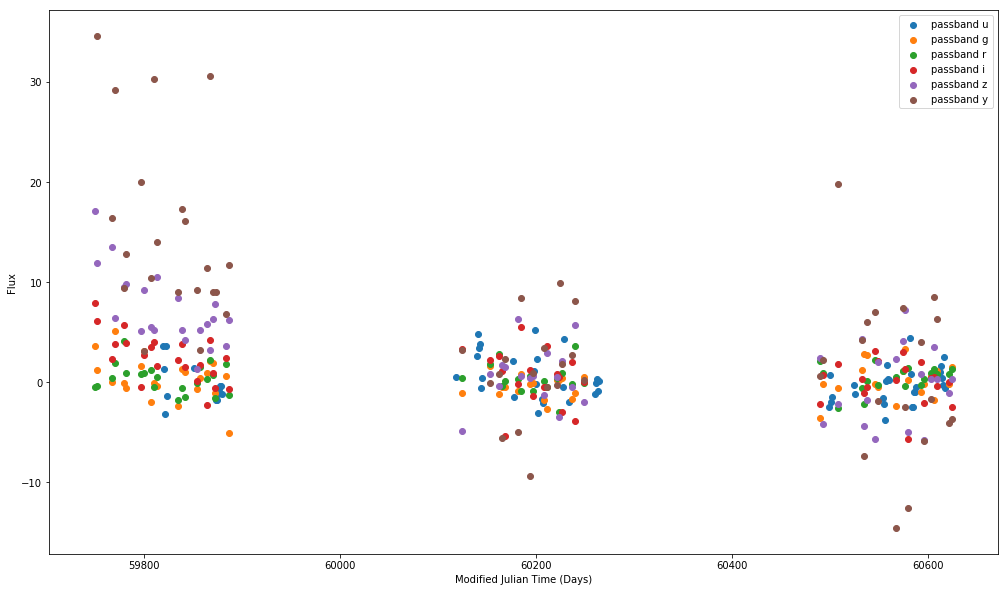

In [77]:
plot_overlay(train['object_id'][7])

# Further exploration:

    3-d plots of light-curves (mjd, flux +- flux_err, detected)
        - this may not be necessary

    Difference between sky coordinates (longitude and latitude) and galactic coordinates and relationships between each
        - sky coordinates are relative to the earth's rotational axis while galactic coordinates are relative to the axis between the sun and the center of the galaxy

    Missing values in time-series data and metadata